**Question 1:** Given some sample data, write a program to answer the following: click here to access the required [data set](https://docs.google.com/spreadsheets/d/16i38oonuX1y1g7C_UAmiK9GkY7cS-64DfiDMNiR41LM/edit#gid=0).

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

1. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
2. What metric would you report for this dataset?
3. What is its value?


In [37]:
# Importing libraries
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt

In [6]:
# Importing the dataset
data = pd.read_csv("2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")
data

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


The data contains the price and quantity purchased from 100 unique sneaker shops with the number of shoes purchased from 1 to 2000. 

In [10]:
np.unique(data["shop_id"])

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [11]:
np.unique(data["total_items"])

array([   1,    2,    3,    4,    5,    6,    8, 2000])

**`Answer 1:`** Now, coming to the AOV (Average Order Value), it has been naively calculated as the average value of the purchase amount for orders over a 30 day window. We can verify this be taking the mean of the column, which matches the value given in the question.

In [14]:
aov = round(np.mean(data["order_amount"]), 2)
print("Average Order Value = $", aov)

Average Order Value = $ 3145.13


However, as we noticed above, some rows in the dataset contain a cumulative price of 2000 sneakers, which tends to be higher and this is responsible for skewing the data and increasing the mean value more than expected. In order to resolve this, we can apply 2 approaches.
1. We can calculate the AOV using the cumulative sum of total order amount divided by the cumulative sum of all the orders placed across all shops. <br>
$ AOV = \frac{\sum Total Order Amount}{\sum Total Number of Orders} $

2. We can calculate the unit price of each order by dividing the order amount by the number of orders and then, calculate the mean of the unit price column. <br>
$ Unit price for each row = \frac{Order Amount}{Number of Items} $ <br>
$ AOV = \frac{\sum Total Unit Price}{Number of records} $

In [16]:
# Using approach 1:
aov_1 = round(sum(data["order_amount"]) / sum(data["total_items"]), 2)
aov_1

357.92

In [45]:
# Using approach 2:
data["unit_price"] = data["order_amount"] / data["total_items"]
aov_2 = round(np.mean(data["unit_price"]), 2)
aov_2

387.74

The values obtained using both the approaches somewhat make sense as compared to the naively calculated mean value of $3145.13. But, in order to explore the data more, let's calculate the median and mode of the unit price column.

In [57]:
# Calculating median and mode
median_value = np.median(data["unit_price"])
mode_value = statistics.mode(data["unit_price"])
print("Median of Unit Price = ", median_value)
print("Mode of Unit Price = ", mode_value)

Median of Unit Price =  153.0
Mode of Unit Price =  153.0


,Metric,Value
0,Mean,387.74
1,Median,153.00
2,Mode,153.00


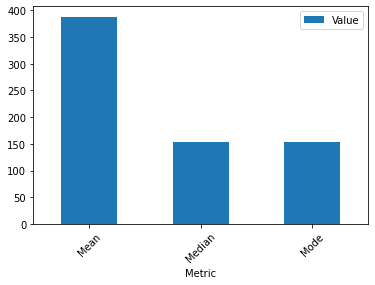

In [60]:
bar = pd.DataFrame({"Metric" : ["Mean", "Median", "Mode"], "Value" : [aov_2, median_value, mode_value]})
bar.plot.bar(x = "Metric", y = "Value", rot = 45)
bar

We can observe that the median and mode purchase values are the same and different from the mean values we obtained earlier. In order to inspect this, we find the average price for each shop.

In [67]:
data

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,unit_price
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,156.0
...,...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17,165.0
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16,117.0
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42,117.0
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18,177.0


In [71]:
avg_each_shop = data.groupby("shop_id").agg({"unit_price" : "mean"})
avg_each_shop = avg_each_shop.sort_values(by = "unit_price", ascending = False)
avg_each_shop

,unit_price
shop_id,
78,25725.0
42,352.0
12,201.0
89,196.0
99,195.0
...,...
53,112.0
100,111.0
32,101.0


We can see that the average unit price for shop 78 is clearly higher than other shops, which means this shop sells shoes at an extremely higher rate than the other shops. Thus, we consider this as an outlier.

In [77]:
shop_78 = data[data["shop_id"] == 78]
shop_78.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,unit_price
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57,25725.0
490,491,78,936,51450,2,debit,2017-03-26 17:08:19,25725.0
493,494,78,983,51450,2,cash,2017-03-16 21:39:35,25725.0
511,512,78,967,51450,2,cash,2017-03-09 7:23:14,25725.0
617,618,78,760,51450,2,cash,2017-03-18 11:18:42,25725.0


Now, we take the mean price leaving out the shop 78 and compare it with the previous mean value.

In [81]:
data_without78 = data[data["shop_id"] != 78]
mean_without78 = round(np.mean(data_without78["unit_price"]), 2)
print("The average order value leaving out shop 78 = $", mean_without78)

The average order value leaving out shop 78 = $ 152.48


**`Answer 2:`** This value is closer to the median and mode that we earlier calculated. Thus, if we remove the outlier (shop 78) data, we get a true sense of the average order value. Thus, mean value is sensitive to outliers which means that if we have a skewed data, it will not represent a true sense of the averaged value. Thus, according to me, **median or mode** metric can be used to find the average order value as they are robust against outliers.

**`Answer 3:`** Value of median and mode

In [82]:
print("Median of Unit Price = ", median_value)
print("Mode of Unit Price = ", mode_value)

Median of Unit Price =  153.0
Mode of Unit Price =  153.0
